<a href="https://colab.research.google.com/github/indranildchandra/ML101-Codelabs/blob/master/src/Feature_Selection_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reference Links
https://www.youtube.com/watch?v=xlHk4okO8Ls

https://stats.stackexchange.com/questions/204141/difference-between-selecting-features-based-on-f-regression-and-based-on-r2

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# upload diabetes.csv file

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 23873 bytes


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

## SelectKBest Features
<br > Feature - Cat,     Target - Cat ==> Chi-Square <br /> 
<br > Feature - Numeric, Target - Numeric ==> Correlation <br /> 
<br > Feature - Cat,     Target - Numeric ==> f_regression <br /> 
<br > Feature - Numeric, Target - Cat ==> f_classification <br /> 

In [0]:
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')
np.random.seed(8)
%matplotlib inline

In [0]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                       pd.Series(y['Outcome'],name='Actual')))
    return 1

In [0]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [0]:
df['BloodPressureSquare'] = np.square(df['BloodPressure'])
df['BloodPressureCube'] = df['BloodPressure']**3
df['BloodPressureSqrt'] = np.sqrt(df['BloodPressure'])

In [0]:
df['GlucoseSquare'] = np.square(df['Glucose'])
df['GlucoseCube'] = df['Glucose']**3
df['GlucoseSqrt'] = np.sqrt(df['Glucose'])

In [0]:
df['GlucoseBloodPressure'] = df['BloodPressure'] * df['Glucose']
df['AgeBMI'] = df['Age'] * df['BMI']

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureSquare,BloodPressureCube,BloodPressureSqrt,GlucoseSquare,GlucoseCube,GlucoseSqrt,GlucoseBloodPressure,AgeBMI
0,6,148,72,35,0,33.600,0.627,50,1,5184,373248,8.485,21904,3241792,12.166,10656,1680.000
1,1,85,66,29,0,26.600,0.351,31,0,4356,287496,8.124,7225,614125,9.220,5610,824.600
2,8,183,64,0,0,23.300,0.672,32,1,4096,262144,8.000,33489,6128487,13.528,11712,745.600
3,1,89,66,23,94,28.100,0.167,21,0,4356,287496,8.124,7921,704969,9.434,5874,590.100
4,0,137,40,35,168,43.100,2.288,33,1,1600,64000,6.325,18769,2571353,11.705,5480,1422.300


In [14]:
categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_feature_columns

[]

In [15]:
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'BloodPressureSquare',
 'BloodPressureCube',
 'BloodPressureSqrt',
 'GlucoseSquare',
 'GlucoseCube',
 'GlucoseSqrt',
 'GlucoseBloodPressure',
 'AgeBMI']

In [0]:
target = 'Outcome'

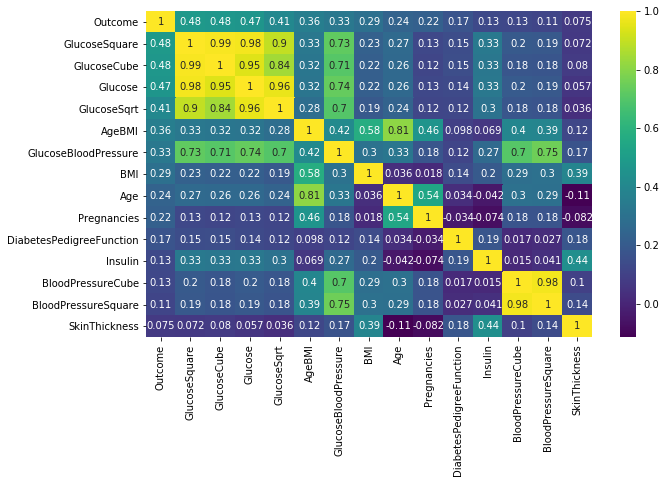

In [17]:
k = 15 #number of variables for heatmap
cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [0]:
X = df.loc[:, df.columns != target]
Y = df.loc[:, df.columns == target]

In [19]:
X.shape

(768, 16)

In [20]:
Y.shape

(768, 1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=8)

In [0]:
clf_lr = LogisticRegression()      
lr_baseline_model = clf_lr.fit(x_train,y_train)

In [23]:
generate_accuracy_and_heatmap(lr_baseline_model, x_test, y_test)

Accuracy is:  0.7598425196850394
F1 score is:  0.6013071895424835


Actual      0   1
Predicted        
0          39  23
1          15   8


1

## Univariate feature selection

In [0]:
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [25]:
selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
12,GlucoseCube,140493344.594
9,BloodPressureCube,916853.946
11,GlucoseSquare,474020.139
14,GlucoseBloodPressure,77960.489
15,AgeBMI,10527.823
8,BloodPressureSquare,4333.499
4,Insulin,1026.387
1,Glucose,924.909
7,Age,93.008
5,BMI,71.933


In [0]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)

In [27]:
x_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BloodPressureSquare,BloodPressureCube,BloodPressureSqrt,GlucoseSquare,GlucoseCube,GlucoseSqrt,GlucoseBloodPressure,AgeBMI
60,2,84,0,0,0,0.000,0.304,21,0,0,0.000,7056,592704,9.165,0,0.000
332,1,180,0,0,0,43.300,0.282,41,0,0,0.000,32400,5832000,13.416,0,1775.300
421,2,94,68,18,76,26.000,0.561,21,4624,314432,8.246,8836,830584,9.695,6392,546.000


In [28]:
x_train_chi[0:3]

array([[0.000e+00, 7.056e+03, 5.927e+05, 0.000e+00, 0.000e+00],
       [0.000e+00, 3.240e+04, 5.832e+06, 0.000e+00, 1.775e+03],
       [3.144e+05, 8.836e+03, 8.306e+05, 6.392e+03, 5.460e+02]])

In [0]:
lr_chi_model = clf_lr.fit(x_train_chi,y_train)

In [30]:
generate_accuracy_and_heatmap(lr_chi_model, x_test_chi, y_test)

Accuracy is:  0.7716535433070866
F1 score is:  0.6027397260273972


Actual      0   1
Predicted        
0          41  24
1          13   7


1

In [0]:
rfe = RFE(estimator=clf_lr, step=1)
rfe = rfe.fit(x_train, y_train)

In [32]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Pregnancies,1
1,Glucose,1
3,SkinThickness,1
5,BMI,1
6,DiabetesPedigreeFunction,1
7,Age,1
10,BloodPressureSqrt,1
13,GlucoseSqrt,1
4,Insulin,2
2,BloodPressure,3


In [0]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

In [34]:
x_train_rfe[0:3]

array([[  2.   ,  84.   ,   0.   ,   0.   ,   0.304,  21.   ,   0.   ,
          9.165],
       [  1.   , 180.   ,   0.   ,  43.3  ,   0.282,  41.   ,   0.   ,
         13.416],
       [  2.   ,  94.   ,  18.   ,  26.   ,   0.561,  21.   ,   8.246,
          9.695]])

In [0]:
lr_rfe_model = clf_lr.fit(x_train_rfe, y_train)

In [36]:
generate_accuracy_and_heatmap(lr_rfe_model, x_test_rfe, y_test)

Accuracy is:  0.7874015748031497
F1 score is:  0.6582278481012658


Actual      0   1
Predicted        
0          37  24
1          17   7


1

## Recursive feature elimination with cross validation

In [37]:
rfecv = RFECV(estimator=clf_lr, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 9
Best features : Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'BloodPressureSqrt', 'GlucoseSqrt'],
      dtype='object')


In [38]:
rfecv.grid_scores_

array([0.663, 0.724, 0.72 , 0.739, 0.755, 0.757, 0.759, 0.763, 0.77 ,
       0.766, 0.77 , 0.768, 0.76 , 0.757, 0.759, 0.751])

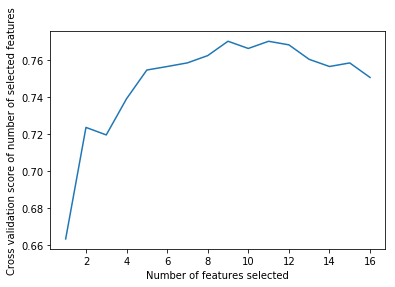

In [39]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [0]:
lr_rfecv_model = clf_lr.fit(x_train_rfecv, y_train)

In [42]:
generate_accuracy_and_heatmap(lr_rfecv_model, x_test_rfecv, y_test)

Accuracy is:  0.7874015748031497
F1 score is:  0.6582278481012658


Actual      0   1
Predicted        
0          37  25
1          17   6


1